In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob 
import vaex
from hammer import dm
root_dir = abspath(join('..', '..'))
root_data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import (style, get_params,
                   get_initial_position_normal, concat, get_data, generate_init)

In [2]:
style()

In [3]:
z_dir_path = join(root_data_dir, 'MCMC-no', 'mock', 'data', 'z')
w_dir_path = join(root_data_dir, 'MCMC-no', 'mock', 'data', 'z')
z_dir_path, w_dir_path

('/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z')

In [4]:
name = "Baryon"
baryon_dir = join(root_data_dir, name)
baryon_dir

'/home2/s20321005/Thesis-Project/Data/Baryon'

In [5]:
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


In [31]:
index = 5
files = glob(join(z_dir_path, "z*"))
file = files[index]
name = file.split("/")[-1].replace(".hdf5", "").replace("z_", "")
zdata = get_data(z_dir_path, index, "z")
wdata = get_data(w_dir_path, index, "w")

zdata, wdata, name

((array([-673.96467849, -610.72071552, -547.47675255, -484.23278958,
         -420.98882661, -357.74486364, -294.50090067, -231.2569377 ,
         -168.01297473, -104.76901176,  -41.52504878,   21.71891419,
           84.96287716,  148.20684013,  211.4508031 ,  274.69476607,
          337.93872904,  401.18269201,  464.42665498,  527.67061795,
          590.91458092,  654.15854389]),
  array([0.00758163, 0.00884523, 0.02274488, 0.03285371, 0.08339788,
         0.11119717, 0.28683816, 0.41067137, 0.64949257, 0.88073214,
         0.98182048, 0.90853143, 0.71140918, 0.48901483, 0.34117314,
         0.18195901, 0.09856113, 0.04928056, 0.03159011, 0.01389965,
         0.01263604, 0.00379081]),
  array([0.00309519, 0.00334318, 0.00536102, 0.00644314, 0.01026557,
         0.01185366, 0.01903812, 0.02277995, 0.02864789, 0.03336011,
         0.03522261, 0.03388251, 0.02998232, 0.02485802, 0.02076314,
         0.01516325, 0.01115985, 0.00789121, 0.00631802, 0.0041909 ,
         0.00399587, 0.0021

## load pred

In [32]:
pred = np.load(join(z_dir_path, 'PHI', f'pred_{name}.npy'))
phis = np.load(join(z_dir_path, 'PHI', f'phi_{name}.npy'))
kin = (phis, pred)
phis.shape, pred.shape

((1000,), (1000, 2, 50))

In [33]:
theta, locs, scales, labels, labs = generate_init("DM")

ndim = len(locs)+24
nwalker = 10*ndim
p0 = dm.generate_p0(nwalker, locs, scales)
indexes = [12] + list(range(len(locs)))
[(loc, th, scale+loc) for loc, th, scale in zip(locs, theta[24:], scales)]

[(-0.05, 0.016, 0.10000000000000002),
 (-1.5, 0.0, 1.5),
 (0.0034, 0.0034, 0.004),
 (-150.0, 0.0, 150.0)]

In [34]:
indexes = [12] + list(range(24, 24+len(locs)))
indexes, labs, labels

([12, 24, 25, 26, 27],
 array(['rhob', 'rhoDM', 'log_nu0', 'R', 'zsun'], dtype='<U32'),
 array(['$\\rho_{b}$', '$\\rho_{\\textup{DM}}$', '$\\log \\nu_0$', '$R$',
        '$z_{\\odot}$'], dtype='<U32'))

In [35]:
dm.log_prob(theta, zdata, kin, locs, scales, dz=1.)

(63.08661695025105, 29.937142913751856)

In [36]:
dm.log_prob_par(p0, zdata, kin, locs, scales, dz=1.)

array([[ 4.90868352e+01, -4.10588981e+04, -4.10098113e+04],
       [ 5.38838173e+01, -3.66538909e+04, -3.66000071e+04],
       [ 5.11040975e+01, -5.45647056e+03, -5.40536647e+03],
       [ 4.86349302e+01, -1.30150572e+03, -1.25287079e+03],
       [ 5.55880690e+01, -1.28206246e+03, -1.22647439e+03],
       [ 5.58669278e+01, -3.38292205e+04, -3.37733536e+04],
       [ 5.33220950e+01, -7.95248088e+02, -7.41925993e+02],
       [ 4.48292001e+01, -1.16887801e+04, -1.16439509e+04],
       [ 4.69963985e+01, -1.43943435e+03, -1.39243795e+03],
       [ 4.86157972e+01, -6.60115422e+02, -6.11499625e+02],
       [ 5.32702763e+01, -9.95701275e+02, -9.42430999e+02],
       [ 4.94172215e+01, -1.36030561e+04, -1.35536388e+04],
       [ 4.93758152e+01, -1.25253157e+03, -1.20315575e+03],
       [ 4.90514117e+01, -8.75214517e+03, -8.70309376e+03],
       [ 5.09204054e+01, -2.87007516e+03, -2.81915476e+03],
       [ 5.08242221e+01, -3.66279989e+04, -3.65771747e+04],
       [ 5.41026221e+01, -1.51225677e+03

# run_mcmc

In [15]:
import hammer
from tqdm import tqdm
import sys
from time import time

def eprint(*args, **kwargs):
    print(*args, file=sys.stderr, **kwargs)

class mcmc:
    models = ["DM", "DDDM", "no"]
    funcs = {
      "DM": hammer.dm,
      "DDDM": hammer.dddm,
      "no": hammer.no
    }
    def __init__(self):
        self.ready = False
        self.props = {"index": False, "z_dir_path": False, "phi_dir_path": False, "model": False}
        self._step0 = 1000
        self._step = 2000
        self._thin = 20
        self.func = None
    def index(self, p):
        self._index = p
        self.props['index'] = True
        return self
    def z_dir_path(self, p):
        self._z_dir_path = p
        self.props['z_dir_path'] = True
        return self
    def phi_dir_path(self, p):
        self._phi_dir_path = p
        self.props['phi_dir_path'] = True
        return self
    def model(self, p):
        if not p in self.models:
            raise ValueError("model must be 'DM', 'DDDM', or 'no'")
        self._model = p
        self.props['model'] = True
        self.func = self.funcs[p]
        return self
    def step0(self, p):
        self._step0 = p
        return self
    def step(self, p):
        self._step = p
        return self
    def thin(self, p):
        self._thin = p
        return self
    def run(self, it=2):
        if not all(self.props.values()):
            eprint("props: ", self.props)
            raise ValueError("all requirement must be set first") 
        print("running...")
        files = glob(join(self._z_dir_path, "z*"))
        files.sort()
        file = files[self._index]
        name = file.split("/")[-1].replace(".hdf5", "").replace("z_", "")
        zdata = get_data(self._z_dir_path, self._index, "z")
        pred = np.load(join(self._phi_dir_path, f'pred_{name}.npy'))
        phis = np.load(join(self._phi_dir_path, f'phi_{name}.npy'))
        kin = (phis, pred)
        theta, locs, scales, labels, labs = generate_init(self._model)
        ndim = len(locs)+24
        indexes = [12] + list(range(24, 24+len(locs)))
        nwalker = 10*ndim
        print("mcmc...")
        p0 = None
        while True:
            p0 = self.func.generate_p0(nwalker, locs, scales)
            prob0 = self.func.log_prob_par(p0, zdata, kin, locs, scales)
            mask = np.isinf(prob0[:, 0])
            p0 = p0[~mask]
            if p0.shape[0] % 2 != 0:
                p0 = np.append(p0, p0[0][None, :], axis=0)
            if len(p0) > 2*ndim:
                break
        for i in tqdm(range(it), desc="mcmc"):
            t0 = time()
            chain = self.func.mcmc(self._step0, zdata, kin, p0, locs, scales, dz=1., parallel=True, verbose=True)
            t1 = time()
            print(f"{i}: first half mcmc done {np.round(t1-t0, 2)} s")
            locs_normal, scales_normal = get_initial_position_normal(self._model, chain=chain[int(self._step0/2):], indexes=indexes)
            while True:
                p0 = self.func.generate_p0(nwalker, locs_normal, scales_normal, norm=True)
                prob0 = self.func.log_prob_par(p0, zdata, kin, locs, scales)
                mask = np.isinf(prob0[:, 0])
                p0 = p0[~mask]
                if p0.shape[0] % 2 != 0:
                    p0 = np.append(p0, p0[0][None, :], axis=0)
                if len(p0) > 2*ndim:
                    break
            t0 = time()
            chain = self.func.mcmc(self._step0, zdata, kin, p0, locs, scales, dz=1., parallel=True, verbose=True)
            t1 = time()
            print(f"{i}: second half mcmc done {np.round(t1-t0, 2)} s")
            p0 = chain[-1]
        chain = self.func.mcmc(self._step, zdata, kin, p0, locs, scales, dz=1., parallel=True, verbose=True)
        chain_thin = chain[::self._thin]
        return indexes, labs, labels, chain_thin

In [37]:
phi_dir_path = join(z_dir_path, "PHI")
indexes, labs, labels, chain_thin = mcmc() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path) \
  .thin(20) \
  .step0(300) \
  .step(2000) \
  .model("DM") \
  .run(3)

running...
mcmc...


mcmc:   0%|          | 0/3 [00:00<?, ?it/s]

0: first half mcmc done 8.99 s


mcmc:  33%|███▎      | 1/3 [00:17<00:35, 17.94s/it]

0: second half mcmc done 8.9 s
1: first half mcmc done 8.9 s


mcmc:  67%|██████▋   | 2/3 [00:35<00:17, 17.94s/it]

1: second half mcmc done 9.0 s
2: first half mcmc done 8.82 s


mcmc: 100%|██████████| 3/3 [00:53<00:00, 17.88s/it]

2: second half mcmc done 8.89 s


In [38]:
step, nwalker, ndim = chain_thin.shape
step, nwalker, ndim

(100, 280, 28)

# plot_chain

In [18]:
class plot_chain:
    def __init__(self):
        self.props = {
            "params": False,
            "labels": False
        }
        self._burn = 0
        self._figsize = (10, 10)
        self._path = None
        self._alpha = 0.1
        self._dpi = 70
    def params(self, p):
        self._params = p
        self.props['params'] = True
        return self
    def labels(self, p):
        self._labels = p
        self.props['labels'] = True
        return self
    def burn(self, p):
        self._burn = p
        return self
    def figsize(self, p):
        self._figsize = p
        return self
    def path(self, p):
        self._path = p
        return self
    def alpha(self, p):
        self._alpha = p
        return self
    def dpi(self, p):
        self._dpi = p
        return self
    def run(self):
        if not all(self.props.values()):
            eprint("props: ", self.props)
            raise ValueError("all requirement must be set first") 
        fig, axes = plt.subplots(len(self._labels), figsize=self._figsize, sharex=True)
        chain_burn = self._params[self._burn:]
        for i, label in tqdm(enumerate(self._labels)):
            ax = axes[i]
            ax.plot(chain_burn[:, :, i], "k", alpha=self._alpha)
            ax.set_xlim(0, len(chain_burn)-1)
            ax.set_ylabel(label)
            ax.yaxis.set_label_coords(-0.1, 0.5)
        if self._path is not None:
            fig.savefig(self._path, dpi=self._dpi)
        axes[-1].set_xlabel("step number")
        plt.show()

5it [00:00,  9.79it/s]


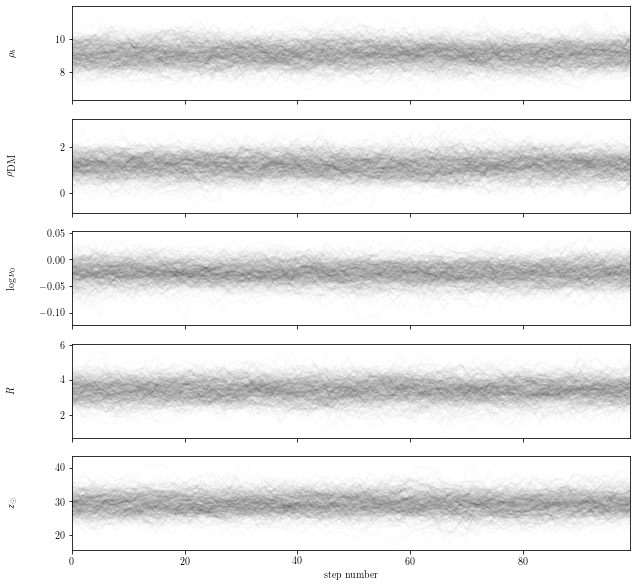

In [39]:
params = get_params(chain_thin, indexes, labs)

plot_chain() \
  .params(params) \
  .labels(labels) \
  .alpha(0.02) \
  .run()

# plot_corner

In [21]:
from corner import corner

class plot_corner:
    def __init__(self):
        self.props = {
            "params": False,
            "labels": False,
        }
        self._burn = 0
        self._path = None
        self._dpi = 70
        self._truths = None
    def params(self, p):
        self._params = p
        self.props['params'] = True
        return self
    def labels(self, p):
        self._labels = p
        self.props['labels'] = True
        return self
    def burn(self, p):
        self._burn = p
        return self
    def path(self, p):
        self._path = p
        return self
    def dpi(self, p):
        self._dpi = p
        return self
    def run(self):
        if not all(self.props.values()):
            eprint("props: ", self.props)
            raise ValueError("all requirement must be set first") 
        fig = corner(self._params[self._burn:]. 
                     reshape((-1, len(self._labels))), 
                   labels=self._labels,
                   quantiles=[0.16, 0.5, 0.84],
                   show_titles=True, title_fmt=".2f", 
                   title_kwargs={"fontsize": 12},
                   truths=self._truths
                  )
        if self._path is not None:
            fig.savefig(self._path, dpi=self._dpi)
        plt.show()

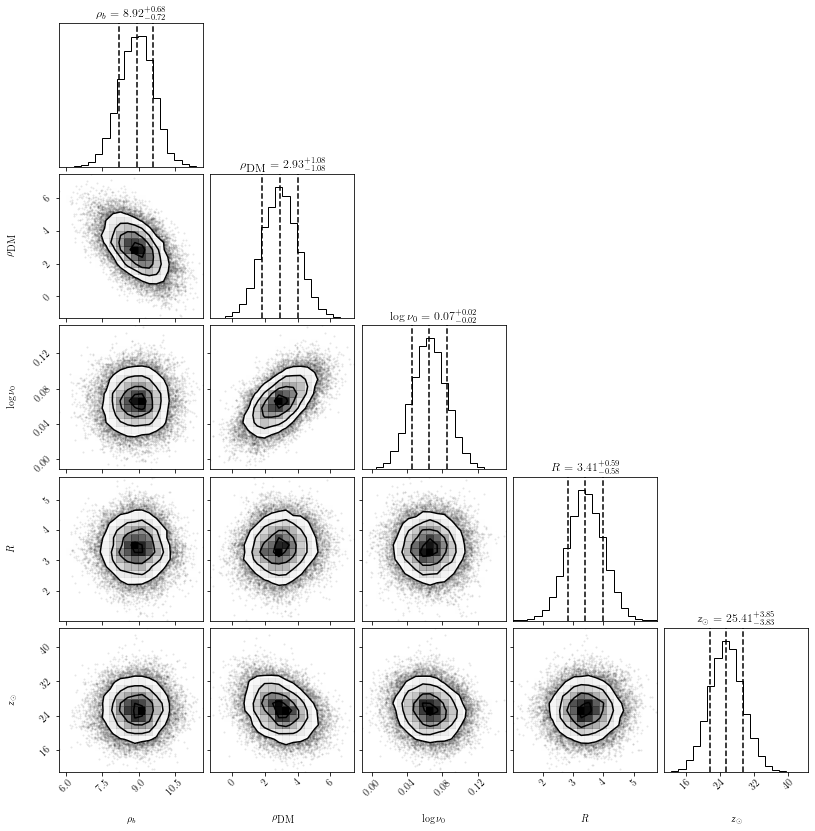

In [22]:
params = get_params(chain_thin, indexes, labs)

plot_corner() \
  .params(params) \
  .labels(labels) \
  .run()

# plot_fit

In [28]:
from tqdm import tqdm
from scipy.optimize import curve_fit
from scipy.stats import norm

class plot_fit_z:
    """required: index, z_dir_path, phi_dir_path, flat, zmax, model
        optional:
            nsample = 5_000
            res = 100
            path = None
            dpi = 70 
        .run to run the program"""
    models = ["DM", "DDDM", "no"]
    funcs = {
      "DM": hammer.dm,
      "DDDM": hammer.dddm,
      "no": hammer.no
    }
    def __init__(self):
        self.props = {
            "index": False,
            "z_dir_path": False,
            "phi_dir_path": False,
            "flat": False,
            "zmax": False,
            "model": False
        }
        self._nsample = 5000
        self._res = 100
        self._path = None
        self._dpi = 70
    def model(self, p):
        if not p in self.models:
            raise ValueError("model must be 'DM', 'DDDM', or 'no'")
        self._model = p
        if p == "DM":
            self.i_zsun = 27
            self.i_log_nu0 = 25
        if p == "DDDM":
            self.i_zsun = 29
            self.i_log_nu0 = 27
        if p == "no":
            self.i_zsun = 26
            self.i_log_nu0 = 24
        self.props['model'] = True
        self.func = self.funcs[p]
        return self
    def index(self, p):
        self._index = p
        self.props['index'] = True
        return self
    def z_dir_path(self, p):
        self._z_dir_path = p
        self.props['z_dir_path'] = True
        return self
    def phi_dir_path(self, p):
        self._phi_dir_path = p
        self.props['phi_dir_path'] = True
        return self
    def flat(self, p):
        self._flat = p
        self.props['flat'] = True
        return self
    def zmax(self, p):
        self._zmax = p 
        self.props['zmax'] = True
        return self
    def nsample(self, p):
        self._nsample = p 
        return self
    def res(self, p):
        self._res = p 
        return self
    def path(self, p):
        self._path = p 
        return self
    def dpi(self, p):
        self._dpi = p 
        return self
    def run(self):
        if not all(self.props.values()):
            eprint("props: ", self.props)
            raise ValueError("all requirement must be set first") 
        files = glob(join(self._phi_dir_path, "phi*"))
        files.sort()
        file = files[self._index]
        name = file.split("/")[-1].replace(".npy", "")
        phis = np.load(file)
        pred = np.load(file.replace("phi", "pred"))
        zdata = get_data(self._z_dir_path, self._index, "z")
        zmid, znum, zerr = zdata
        zn = []
        for _ in tqdm(range(self._nsample)):
            th = self._flat[np.random.randint(len(self._flat))]
            zsun = th[self.i_zsun]
            log_nu0 = th[self.i_log_nu0]
            nu0 = np.exp(log_nu0)
            zt = self.func.phi_invers(phis, th, self._zmax*1.5, dz=0.5)
            zrel = zt + zsun
            for i, zt_i in enumerate(zrel):
                pred_i = pred[i]
                znum_mod, znum_weight = pred_i
                sgn = np.random.choice([-1, 1])
                zt_i = zt_i*sgn - zsun
                zn.append((zt_i, [np.log(nu0)+np.log(znum_mod), znum_weight]))
        z_edge = np.linspace(zmid.min()*1.1, zmid.max()*1.1, self._res)
        z_mid = (z_edge[1:]+z_edge[:-1])/2
        ynum = np.empty((2, len(z_edge)-1))
        for i, (z0, z1) in enumerate(zip(tqdm(z_edge[:-1]), z_edge[1:])):
            ys = np.array([zn_i[1][0] for zn_i in zn if (zn_i[0] <z1) and (zn_i[0] >z0)]).flatten()
            weights = np.array([zn_i[1][1] for zn_i in zn if (zn_i[0] <z1) and (zn_i[0] >z0)]).flatten()
            yn, yedge = np.histogram(ys, bins=50, weights=weights, density=True)
            if any(np.isnan(yn)):
                ynum[:, i] = [0, 1]    
                continue
            ymid = (yedge[1:]+yedge[:-1])/2
            mu = np.sum(ymid*yn)/np.sum(yn)
            sigma = np.sqrt(np.sum(yn*(ymid-mu)**2)/np.sum(yn))
            ynum[:, i] = [mu, sigma]
        ymid = ynum[0]
        yerr = ynum[1]

        plt.figure(figsize=(10,5))
        plt.errorbar(zmid, znum, yerr=zerr, fmt='.', color='k', alpha=0.5)
        plt.fill_between(z_mid, np.exp(ymid-yerr), np.exp(ymid+yerr), alpha=0.2, color='C0')
        plt.fill_between(z_mid, np.exp(ymid-2*yerr), np.exp(ymid+2*yerr), alpha=0.2, color='C0')
        plt.fill_between(z_mid, np.exp(ymid-3*yerr), np.exp(ymid+3*yerr), alpha=0.2, color='C0')
        plt.xlabel(r"$z$ (pc)")
        plt.ylabel(r"$\nu(z)/\nu_0$")
        plt.title(name)
        if self._path is not None:
            plt.savefig(self._path, dpi=self._dpi)
            print("saved ", self._path)
        plt.show()

100%|██████████| 29/29 [00:02<00:00, 11.49it/s]


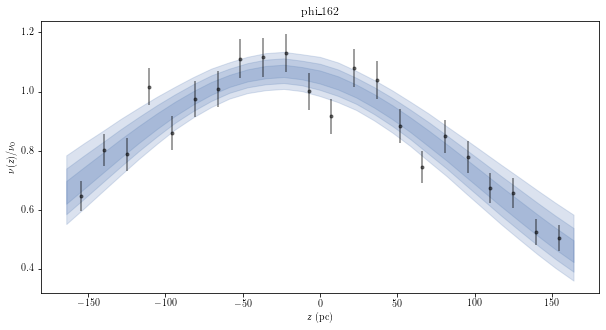

In [30]:
flat_samples = chain_thin.reshape(-1, ndim)
zdata = get_data(z_dir_path, index, "z")
zmid, znum, zerr = zdata
zmax = np.max(np.abs(zmid))

plot_fit_z().index(index) \
          .phi_dir_path(phi_dir_path) \
          .z_dir_path(z_dir_path) \
          .flat(flat_samples) \
          .zmax(zmax) \
          .model("DM") \
          .res(30) \
          .nsample(500) \
          .run()

# calculate max likelihood

In [121]:
import hammer
from datetime import datetime

class calculate_prob:
    models = ["DM", "DDDM", "no"]
    funcs = {
      "DM": hammer.dm,
      "DDDM": hammer.dddm,
      "no": hammer.no
    }
    def __init__(self):
        self.props = {
          "index": False, 
          "z_dir_path": False, 
          "phi_dir_path": False, 
          "model": False,
          "flat": False,
          "path": False
        }
        self._batch = 10_000
    def index(self, p):
        self._index = p
        self.props['index'] = True
        return self
    def z_dir_path(self, p):
        self._z_dir_path = p
        self.props['z_dir_path'] = True
        return self
    def phi_dir_path(self, p):
        self._phi_dir_path = p
        self.props['phi_dir_path'] = True
        return self
    def model(self, p):
        if not p in self.models:
            raise ValueError("model must be 'DM', 'DDDM', or 'no'")
        self._model = p
        self.props['model'] = True
        self.func = self.funcs[p]
        return self
    def flat(self, p):
        self._flat = p
        self.props['flat'] = True
        return self
    def path(self, p):
        self._path = p
        self.props['path'] = True
        return self
    def batch(self, p):
        self._batch = p
        return self
    def run(self):
        if not all(self.props.values()):
            eprint("props: ", self.props)
            raise ValueError("all requirement must be set first")
        print("running...")
        files = glob(join(self._z_dir_path, "z*"))
        files.sort()
        file = files[self._index]
        name = file.split("/")[-1].replace(".hdf5", "").replace("z_", "")
        zdata = get_data(self._z_dir_path, self._index, "z")
        print("opening pred file...")
        pred = np.load(join(self._phi_dir_path, f'pred_{name}.npy'))
        print("opening phis file...")
        phis = np.load(join(self._phi_dir_path, f'phi_{name}.npy'))
        kin = (phis, pred)
        _, locs, scales, _, _ = generate_init(self._model)
        # calculate likelihood
        print("Calculating likelihood")
        probs = self.func.log_prob_par(self._flat, zdata, kin, locs, scales, dz=1., batch=self._batch)
        likelihood = probs[:, 1]
        # remove nan from likelihood
        likelihood = likelihood[~np.isnan(likelihood)]
        max_likelihood = np.max(likelihood)
        # calculate BIC
        zmid = zdata[0]
        wmid = wdata[0]
        bic = -2 * max_likelihood + ndim * np.log(3*len(zmid)+len(zmid)*pred.shape[1]*pred.shape[2])
        aic = -2 * max_likelihood + 2 * ndim
        print(f"max log-likelihood: {max_likelihood}")
        print(f"BIC: {bic}")
        print(f"AIC: {aic}")
        with open(self._path, 'a') as f:
            f.write(f"{index},{max_likelihood},{bic},{aic},{datetime.now()}\n")

In [122]:
flat_chain = chain_thin.reshape((-1, ndim))
calculate_prob() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path) \
  .model("DM") \
  .flat(flat_samples) \
  .path(join(z_dir_path, "stats.txt")) \
  .run()

running...
opening pred file...
opening phis file...
Calculating likelihood
max log-likelihood: 29.61331523875603
BIC: 157.0949698869506
AIC: -3.2266304775120602


# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.

# test utils

In [1]:
from os.path import abspath, join
import sys
from glob import glob 
import vaex
import numpy as np
root_dir = abspath(join('..', '..'))
root_data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import mcmc, plot_chain, plot_corner, plot_fit_z, calculate_prob, get_params, get_data

In [2]:
z_dir_path = join(root_data_dir, 'MCMC-no', 'mock', 'data', 'z')
w_dir_path = join(root_data_dir, 'MCMC-no', 'mock', 'data', 'z')
phi_dir_path = join(root_data_dir, 'MCMC-no', 'mock', 'data', 'z', 'PHI')
z_dir_path, w_dir_path, phi_dir_path

('/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/mock/data/z/PHI')

In [3]:
print(mcmc.__doc__)

required: index, z_dir_path, phi_dir_path, model
        optional:
            step0 = 1000
            step = 2000
            thin = 20
        .run(it=2) to run the program. it is the mcmc iteration.
        return:
            dict(indexes, labs, labels, chain)


In [4]:
index = 0

result = mcmc() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path) \
  .model("DM") \
  .step0(50) \
  .step(100) \
  .thin(1) \
  .run()

result.keys()

running...
mcmc...


mcmc:   0%|          | 0/2 [00:00<?, ?it/s]

0: first half mcmc done 1.27 s


mcmc:  50%|█████     | 1/2 [00:02<00:02,  2.52s/it]

0: second half mcmc done 1.22 s
1: first half mcmc done 1.2 s


mcmc: 100%|██████████| 2/2 [00:04<00:00,  2.49s/it]

1: second half mcmc done 1.24 s


dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [5]:
indexes, labs, labels, chain = result.values()
indexes, labs, labels

([12, 24, 25, 26, 27],
 array(['rhob', 'rhoDM', 'log_nu0', 'R', 'zsun'], dtype='<U32'),
 array(['$\\rho_{b}$', '$\\rho_{\\textup{DM}}$', '$\\log \\nu_0$', '$R$',
        '$z_{\\odot}$'], dtype='<U32'))

In [6]:
print(plot_chain.__doc__)

required: 
            params (from `get_params`),
            labels
        optional:
            burn = 0
            figsize = (10, 10)
            path = None
            alpha = 0.1
            dpi = 70
        .run to run the program


5it [00:00,  9.85it/s]


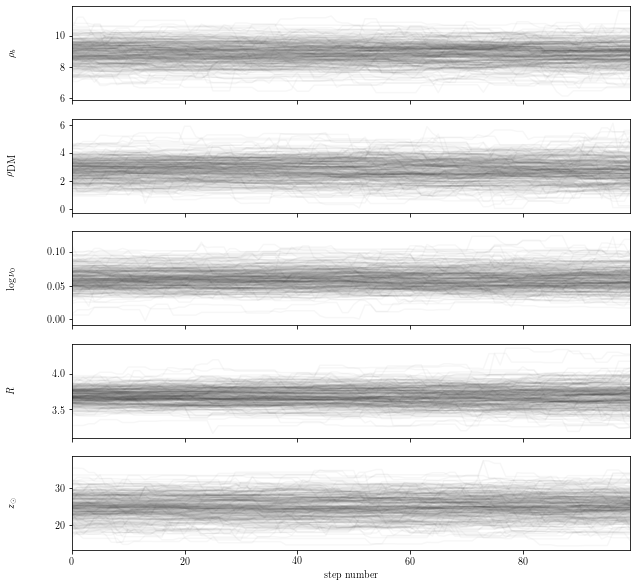

In [7]:
params = get_params(chain, indexes, labs)
plot_chain() \
  .params(params) \
  .labels(labels) \
  .alpha(0.03) \
  .run()

In [8]:
print(plot_corner.__doc__)

required: 
            params (from `get_params`),
            labels
        optional:
            burn = 0
            path = None
            dpi = 70
            truths = None (list of the real values)
        .run to run the program


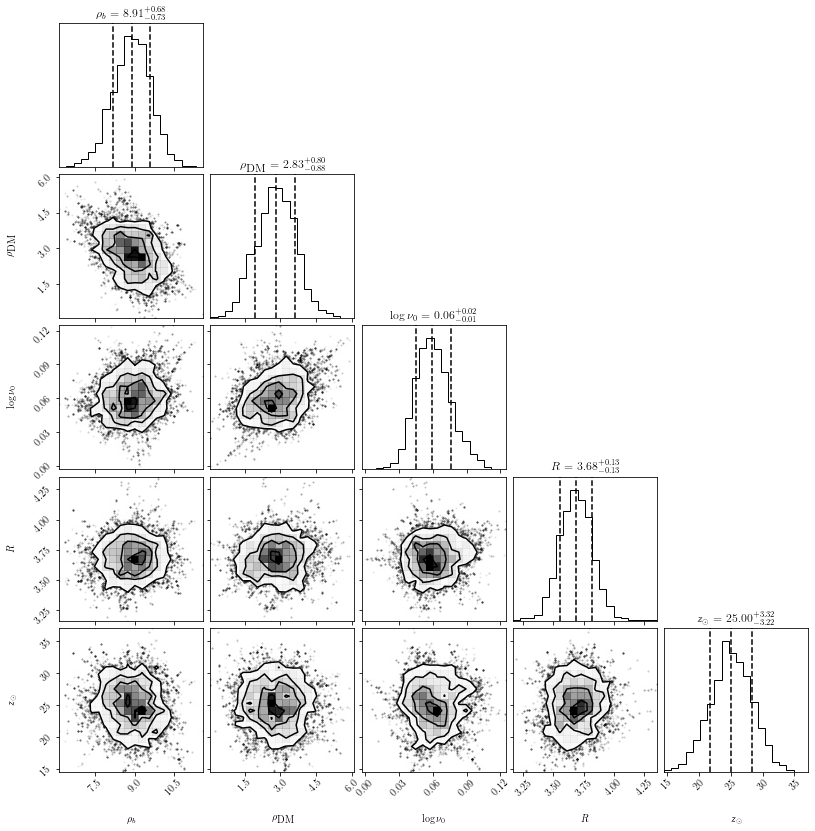

In [9]:
plot_corner() \
  .params(params) \
  .labels(labels) \
  .run()

In [10]:
print(plot_fit_z.__doc__) 

required: index, z_dir_path, phi_dir_path, flat, zmax, model
        optional:
            nsample = 5_000
            res = 100
            path = None
            dpi = 70
        .run to run the program


In [11]:
ndim = chain.shape[2]
flat_sample = chain.reshape((-1, ndim))
zdata = get_data(z_dir_path, index, "z")
zmid = zdata[0]
zmax = np.max(np.abs(zmid))*2

100%|██████████| 99/99 [01:20<00:00,  1.23it/s]


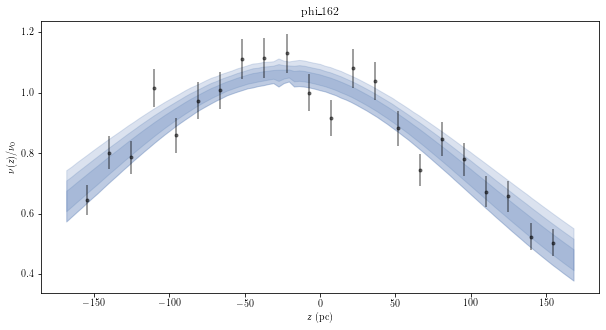

In [12]:
plot_fit_z() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path)  \
  .flat(flat_sample) \
  .zmax(zmax) \
  .model("DM") \
  .run()

In [14]:
print(calculate_prob.__doc__)

required: index, z_dir_path, phi_dir_path, model, flat, path
        optional:
            batch = 10_000
        .run to run the program


In [6]:
ndim = chain.shape[2]
flat_sample = chain.reshape((-1, ndim))

calculate_prob() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path) \
  .model("DM")  \
  .flat(flat_sample) \
  .path("tes.txt") \
  .run()

running...
opening pred file...
opening phis file...
Calculating likelihood
max log-likelihood: 29.661363576854313
BIC: 156.99887321075403
AIC: -3.3227271537086267
